<a href="https://colab.research.google.com/github/hansolothe3rd/Food-Sales-Predictions/blob/main/Food_Sales_Predictions_11_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 4
- Daniel Barella  
- 11/3/22

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning


1) How many rows and columns?



In [7]:
df.shape

(8523, 12)

2) What are the datatypes of each variable?



In [8]:
df.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) Are there duplicates? If so, drop any duplicates.



In [9]:
df.duplicated().sum()

0

4) Identify missing values.



In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).



In [11]:
item_weight_mean = df['Item_Weight'].mean



In [12]:
df['Item_Weight'].fillna(value=item_weight_mean, inplace=True)
df['Outlet_Size'].fillna('Missing', inplace=True)

The column 'Item_Weight is a float type, so decided to go with replacing it with the mean. 'Outlet_Size on the other hand is object type, so filling in with 'Missing' seemed appropriate.

6) Confirm that there are no missing values after addressing them.



In [13]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).



In [14]:
df.nunique

<bound method DataFrame.nunique of      Item_Identifier Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.3          Low Fat         0.016047   
1              DRC01        5.92          Regular         0.019278   
2              FDN15        17.5          Low Fat         0.016760   
3              FDX07        19.2          Regular         0.000000   
4              NCD19        8.93          Low Fat         0.000000   
...              ...         ...              ...              ...   
8518           FDF22       6.865          Low Fat         0.056783   
8519           FDS36        8.38          Regular         0.046982   
8520           NCJ29        10.6          Low Fat         0.035186   
8521           FDN46        7.21          Regular         0.145221   
8522           DRG01        14.8          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1     

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [16]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [19]:
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [20]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


## Exploritory Visuals


For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

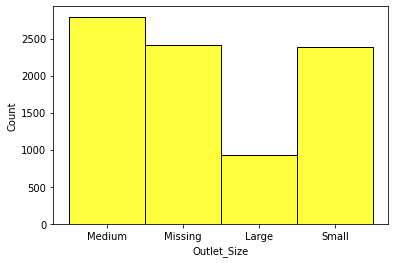

In [21]:
sns.histplot(data=df,x='Outlet_Size',color='yellow');

 [X] We can see from this histogram that most of the outlets are medium sized. The Lowest amount is Large outlets.

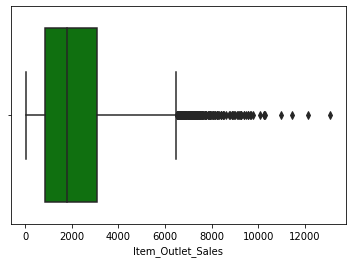

In [22]:
sns.boxplot(data=df,x='Item_Outlet_Sales',color='green');

 [X] This boxplot shows that there are a lot of outliars in the Item Outlet Sales, and that the mean i around 2000.

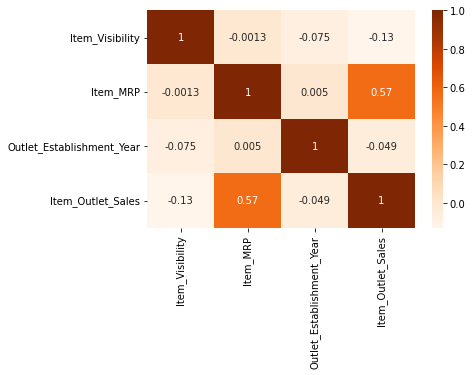

In [23]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Oranges',annot = True);

 [X] There seems to be a moderate correlation between Item MRP and Item Outlet Sales.

## Explanitory Visuals

For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

- Build on your previous cleaning, exploration, and analysis.
- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.



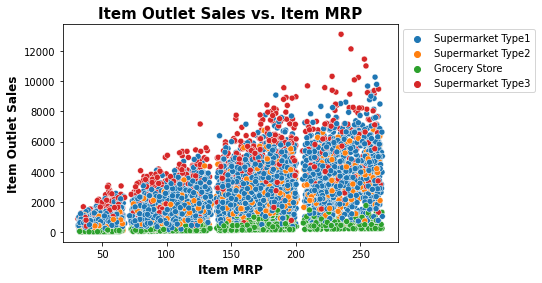

In [81]:
ax = sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue='Outlet_Type')
ax.set_title('Item Outlet Sales vs. Item MRP',fontsize = 15, fontweight = 'bold')
ax.set_xlabel('Item MRP',fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales',fontsize = 12, fontweight = 'bold')
ax.legend(bbox_to_anchor = [1, 1]);

It seems that as the Item MRP goes up the Item Outlet Sales do as well.  With the Outlet Type as the legend, you can see that Supermarket Type 3 leads the pack with Item Outlet sales.

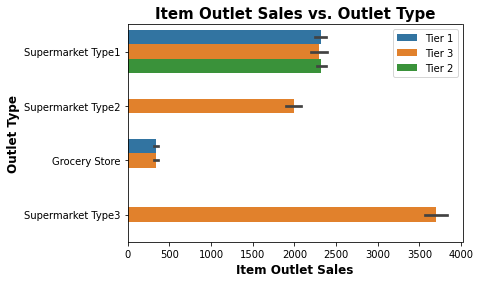

In [83]:
ax = sns.barplot(data = df, x = 'Item_Outlet_Sales', y = 'Outlet_Type', hue='Outlet_Location_Type')
ax.set_title('Item Outlet Sales vs. Outlet Type',fontsize = 15, fontweight = 'bold')
ax.set_xlabel('Item Outlet Sales',fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Outlet Type',fontsize = 12, fontweight = 'bold')
ax.legend(bbox_to_anchor = [1, 1]);

Having the Outlet Types and the Outlet Location Type seperate but on the same graph, we get a real picture of what type of stores and what type of location produces the most sales.